<a href="https://colab.research.google.com/github/ali-kin4/MachineLearning/blob/main/ML_with_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import time
sns.set()

In [ ]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
from tqdm import tqdm_notebook as tqdm
with tqdm(range(1)) as pbar:
  pass

In [58]:
class MLModel:
  def __init__(self, df, seed, model_name):
    self.df = df
    self.seed = seed
    self.model_name = model_name
    X, y, X_train, X_test, y_train, y_test, y_pred, model = 0, 0, 0, 0, 0, 0, 0, 0
    self.X = X
    self.y = y
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test
    self.y_pred = y_pred
    self.model = model

  def null_checker(self):
    return (df.isnull().sum())
  
  def separator(self):
    self.X = df.iloc[:, :-1]
    self.y = df.iloc[:,-1]

  def data_encoder(self):
    encoder = LabelEncoder()
    self.y = encoder.fit_transform(self.y)

  def null_imputer(self):
    if (sum(self.null_checker()) != 0):
      cols = []
      for col in self.X.columns: 
          cols.append(col) 

      imputer = KNNImputer(n_neighbors=2)
      X_filled = imputer.fit_transform(self.X)
      X_new = pd.DataFrame(data=X_filled, columns=cols)
      self.X = X_new

  def data_scaler(self):
    scaler = MinMaxScaler()
    scaler.fit(self.X)
    self.X = scaler.transform(self.X)

  def data_splitter(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=self.seed)

  def metrics_calc(self):
    print(classification_report(self.y_test, self.y_pred))
    print("="*30)
    print("Accuracy: {}".format(accuracy_score(self.y_test, self.y_pred)))
#------------------------------------------------------------------------------------------------
# ML models:
  def SVM(self):
    print("SVM")
    svc = SVC(probability=True)  # Default hyperparameters -- put probability=True if you want to plot ROC Curve
    svc.fit(self.X_train, self.y_train)
    y_pred = svc.predict(self.X_test)
    self.y_pred = y_pred
    self.model = svc
    self.metrics_calc() #calculate metrics

  def logreg(self):
    print("LogReg")
    model = LogisticRegression(max_iter=1000)
    model.fit(self.X_train, self.y_train)
    y_pred = model.predict(self.X_test)
    self.y_pred = y_pred
    self.model = model
    self.metrics_calc()

  def NB(self):
    print("Naive Bayes")
    NB = GaussianNB()
    NB.fit(self.X_train, self.y_train)
    y_pred = NB.predict(self.X_test)
    self.y_pred = y_pred
    self.model = NB
    self.metrics_calc()

  def DT(self):
    print("Decision Tree")
    DT = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
    DT.fit(self.X_train, self.y_train)
    y_pred = DT.predict(self.X_test)
    self.y_pred = y_pred
    self.model = DT
    self.metrics_calc()
  
  def KNN(self):
    print("K Nearest Neighbors (KNN)")
    KNN = KNeighborsClassifier(n_neighbors = 5)
    KNN.fit(self.X_train, self.y_train)
    y_pred = KNN.predict(self.X_test)
    self.y_pred = y_pred
    self.model = KNN
    self.metrics_calc()

  def NN(self):
    print("Neural Networks")
    NN = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1500, activation = 'relu', solver='adam', random_state=42)
    NN.fit(self.X_train, self.y_train)
    y_pred = NN.predict(self.X_test)
    self.y_pred = y_pred
    self.model = NN
    self.metrics_calc()

  def RF(self):
    print("Random Forest")
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(self.X_train, self.y_train)
    y_pred = clf.predict(self.X_test)
    self.y_pred = y_pred
    self.model = clf
    self.metrics_calc()
#------------------------------------------------------------------------------------------------
  def roc_plotter(self):
    y_pred_proba = self.model.predict_proba(self.X_test)
    fpr0, tpr0, _ = roc_curve(self.y_test, y_pred_proba[:, 0], pos_label=self.model.classes_[0]) #class 0
    fpr1, tpr1, _ = roc_curve(self.y_test, y_pred_proba[:, 1], pos_label=self.model.classes_[1]) #class 1

    plt.figure(figsize = (8, 8))
    plt.xlabel("FP Rate")
    plt.ylabel("TP Rate")
    plt.plot(fpr0, tpr0, label = 'class 0', linewidth = 2)
    plt.plot(fpr1, tpr1, label = 'class 1', linewidth = 2)
    plt.title("ROC Curve")
    plt.legend()
    plt.autoscale(enable=True, axis='both', tight=False)
    plt.show()

  def conf_matrix(self):
    cnf_matrix = confusion_matrix(self.y_test, self.y_pred)

    fig, ax = plt.subplots(figsize=(7, 7))
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title("Confusion matrix", y=1.1)
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label");

  def model_selector(self):
    if self.model_name == "SVM":
      self.SVM()
    elif self.model_name == "LogReg":
      self.logreg()
    elif self.model_name == "NB":
      self.NB()
    elif self.model_name == "DT":
      self.DT()
    elif self.model_name == "KNN":
      self.KNN()
    elif self.model_name == "NN":
      self.NN()
    elif self.model_name == "RF":
      self.RF()

  def auto_learn(self):
    self.null_checker()
    self.separator()
    self.data_encoder()
    self.null_imputer()
    self.data_scaler()
    self.data_splitter()
    self.model_selector()

In [67]:
file_name = '/content/voice.csv'
df = pd.read_csv(file_name)
seed = 8

#models: SVM, LogReg, NB, DT, KNN, NN, RF

voice = MLModel(df, seed, "NN")

start_time = time.time()

voice.auto_learn()

print('='*30)
print("Run time: {} seconds".format((time.time() - start_time)))

Neural Networks
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       325
           1       0.99      0.98      0.99       309

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634

Accuracy: 0.9873817034700315
Run time: 5.28540301322937 seconds


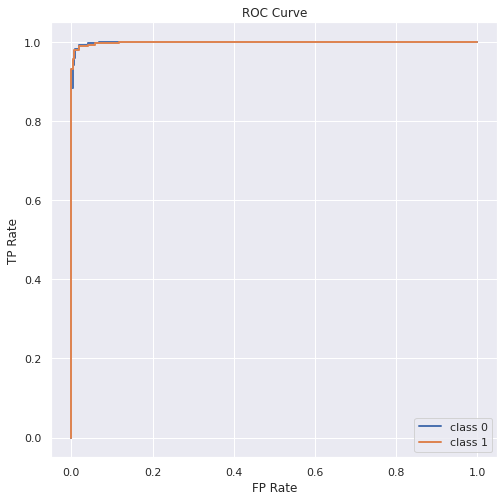

In [68]:
voice.roc_plotter()

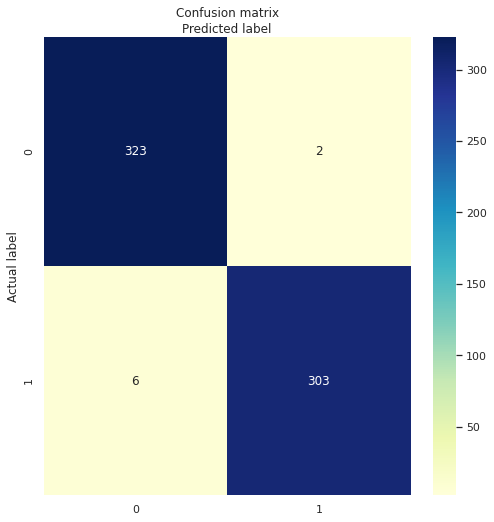

In [69]:
voice.conf_matrix()